<class 'lightkurve.lightcurve.KeplerLightCurve'> <class 'lightkurve.targetpixelfile.KeplerTargetPixelFile'>


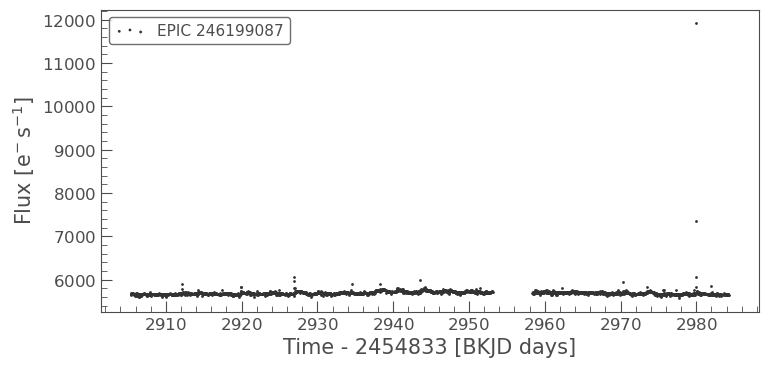

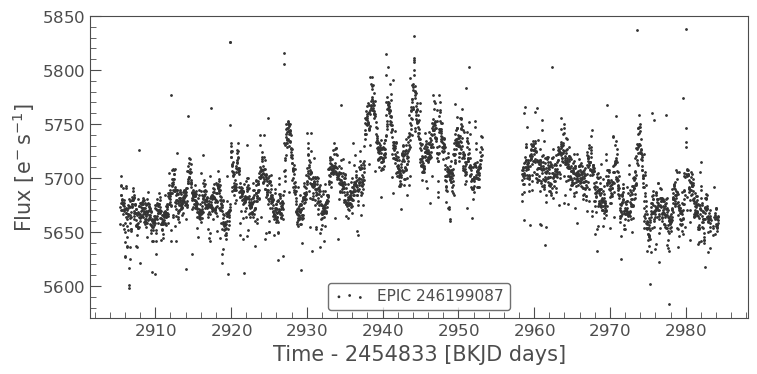

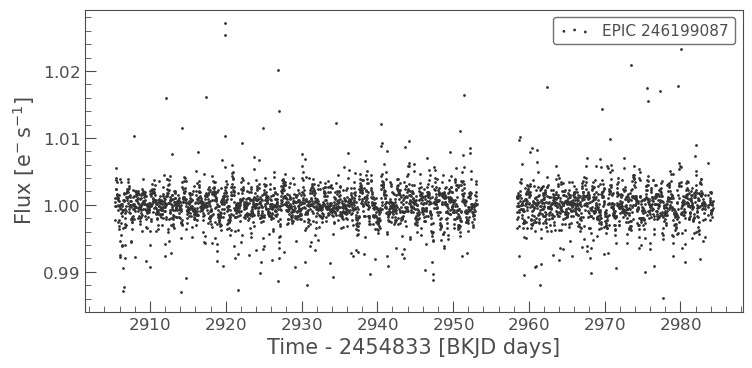

In [1]:
import lightkurve as lk
import pandas as pd

pixelfile = lk.search_targetpixelfile("Trappist-1")[1].download()
lc = pixelfile.to_lightcurve(method="pld")
lc.scatter()
lc = lc.remove_outliers()
lc.scatter()
lc = lc.flatten() #normalized
lc.scatter()
#lc.to_periodogram("bls").plot()

#print(lc.flux)
#period = lc.to_periodogram("bls").period_at_max_power
#lc = lc.fold(period)
#lc.scatter()

print(type(lc), type(pixelfile))

In [2]:
def min_max_scaler(data):
    mn = min(data)
    mx = max(data)
    data -= mn
    data /= (mx-mn)
    return data

In [3]:
print(lc.flux)
temp = min_max_scaler(lc.flux.value)
pd.DataFrame(temp).describe()

[0.99767769 1.00045036 0.99981793 ... 0.99990898 1.00059829 0.9994873 ] electron / s


,0
count,3346.000000
mean,0.338960
std,0.070781
min,0.000000
25%,0.306147
50%,0.338867
75%,0.372992
max,1.000000


In [4]:
import numpy as np
with open('Models/lk.npy', 'wb') as f:
    np.save(f, temp)